### Importing required modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

### Loading dataset 

In [2]:
df= pd.read_csv(r"SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Cleaning and studying the dataset

*Since Postal Code is a string and is of no use during the analysis of the data, hence we can drop it from our dataset.*

In [3]:
df.drop("Postal Code", axis = 1, inplace = True)

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

_There are no NULL values in our dataset._

_Extracting total unique values in each column -_

In [5]:
for i in df.columns:
    print(i," : ", len(df[i].unique()))

Ship Mode  :  4
Segment  :  3
Country  :  1
City  :  531
State  :  49
Region  :  4
Category  :  3
Sub-Category  :  17
Sales  :  5825
Quantity  :  14
Discount  :  12
Profit  :  7287


In [6]:
df.describe() 

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


### Analysing the dataset 

_Heatmap is showing correlation beteween different numeric attributes_

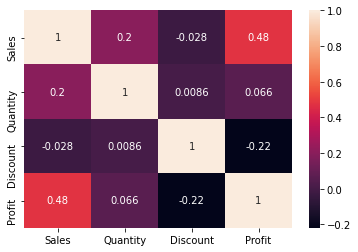

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Category vs Sales and Profit Analysis

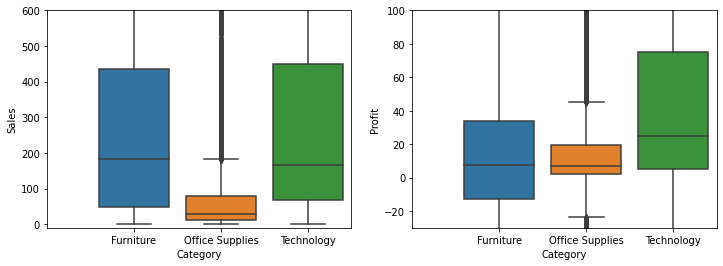

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4)) 
sns.boxplot(x = "Category", y = "Sales", data = df, ax = ax1).axis([-1,2.5,-10,600])
sns.boxplot(x = "Category", y = "Profit", data = df, ax = ax2).axis([-1,2.5,-30,100])

plt.tight_layout
plt.show()

_"Office Supplies" among all the categories have the least profit and least sale as well_

### Analysing Sub-Category

In [9]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.62,2,0.0,6.8714


In [10]:
gp_c = df.groupby(["Sub-Category"])  # grouping/splitting data based on Sub-Category
gp_c = gp_c.sum()

In [11]:
list_subC = list(df["Sub-Category"].unique())
list_subC.sort()

#### Graph Plotting  

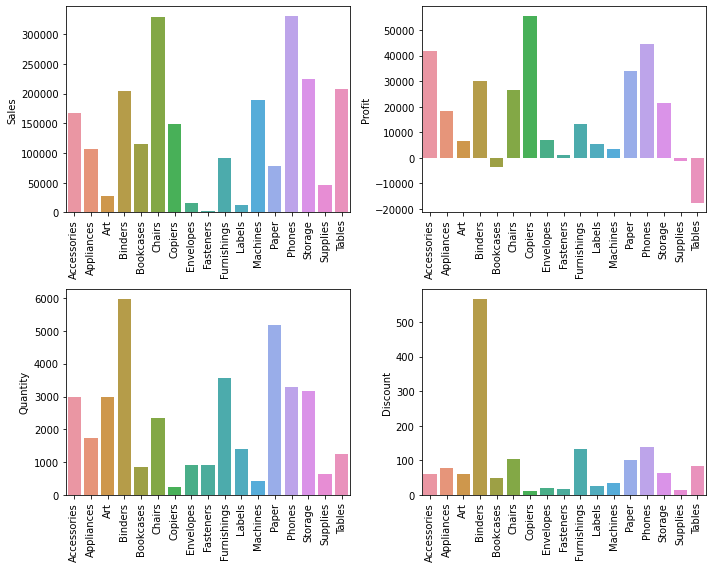

In [12]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2,2, figsize = (10,8))

a1 = sns.barplot(x = list_subC, y = gp_c.Sales, ax = ax1)
a2 = sns.barplot(x = list_subC, y = gp_c.Profit, ax = ax2)
a3 = sns.barplot(x = list_subC, y = gp_c.Quantity, ax = ax3)
a4 = sns.barplot(x = list_subC, y = gp_c.Discount, ax = ax4)

a1.set_xticklabels(a1.get_xticklabels(), rotation=90)
a2.set_xticklabels(a2.get_xticklabels(), rotation=90)
a3.set_xticklabels(a3.get_xticklabels(), rotation=90)
a4.set_xticklabels(a4.get_xticklabels(), rotation=90)

fig.tight_layout()
plt.show()

_1. Since profit of "Tables", "Supplies", "Bookcases"  are negitive values, so discount should not be there on these items and should be taken care of._

_2. Sales of "Envelops", "Fasteners", "Arts" and "Labels" are low, therefore more schemes should be introduced to improve the corporate sales._

### Analysing Regions

In [13]:
gp_region = df.groupby(["Region"])
gp_region = gp_region.sum()
gp_region

,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


#### Graph Plotting

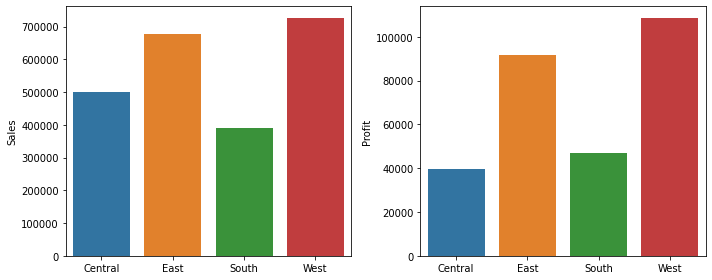

In [14]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize = (10,4))
sns.barplot(x = ["Central", "East", "South", "West"], y = gp_region.Sales, ax = ax1)
sns.barplot(x = ["Central", "East", "South", "West"], y = gp_region.Profit, ax = ax2)
plt.tight_layout()
plt.show()

_1. Sales in South-Region is minimum_

_2. Central-Region is generating least profit_  

_Therefore, both regions should be taken into account._

### Analysing States

In [15]:
gp_state = df.groupby(["State"])
gp_state = gp_state.sum()
gp_state.head(3)

,Sales,Quantity,Discount,Profit
State,,,,
Alabama,19510.640,256,0.0,5786.8253
Arizona,35282.001,862,68.0,-3427.9246
Arkansas,11678.130,240,0.0,4008.6871


In [16]:
list_state = df.State.unique()
list_state.sort()

#### Graph Plotting

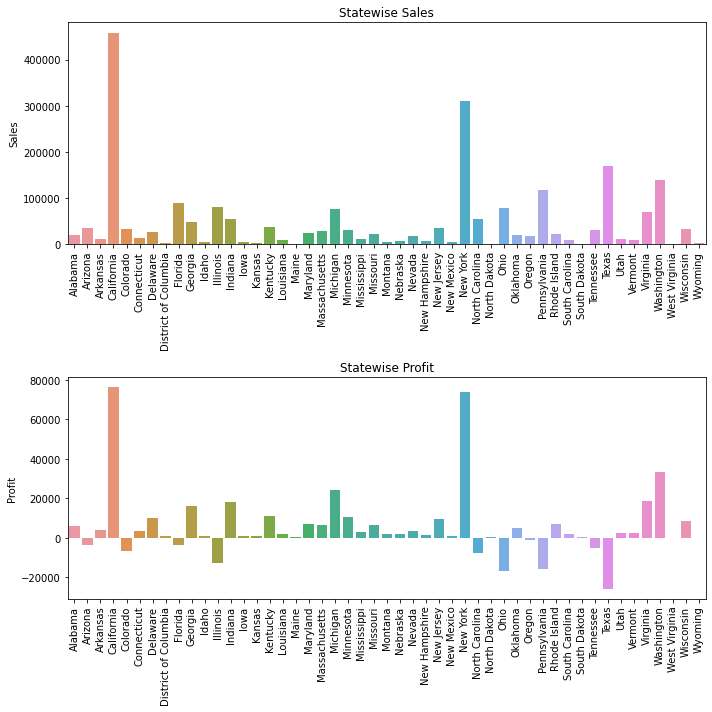

In [17]:
fig, (ax1, ax2)= plt.subplots(2,1, figsize = (10,10))

d1 = sns.barplot(x = list_state, y = gp_state.Sales, ax = ax1)
d2 = sns.barplot(x = list_state, y = gp_state.Profit, ax = ax2)

d1.set_xticklabels(d1.get_xticklabels(), rotation=90)
d2.set_xticklabels(d2.get_xticklabels(), rotation=90)

d1.set(title= "Statewise Sales")
d2.set(title= "Statewise Profit")

plt.tight_layout()
plt.show()

_1. "Arizona", "Colarado", "Florida", "Illinois", "North-Carolina", "Ohio", "Pennsylvania" and "Texas" have negative profit_

_2. "North dakota" has minimum Sale._

_Therefore, these states should be considered for improvement._

### Analysing Segments

In [18]:
gp_segm = df.groupby("Segment")[["Sales", "Discount", "Profit"]].mean()

gp_segm

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


#### Graph Plotting

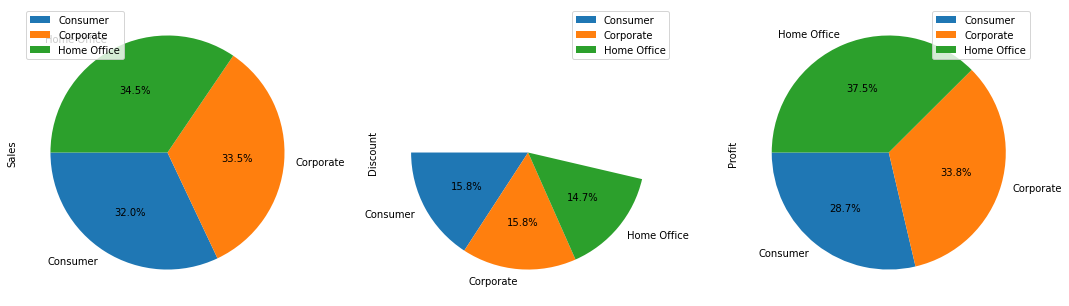

In [19]:
gp_segm.plot.pie(subplots = True, figsize = (15,10), startangle = 180, autopct = '%.1f%%')
plt.tight_layout()
plt.show()

_Consumer Segment has minimum average-sale. Also average-profit is minimum in the respective segment._

### Analysing Ship-Mode

In [20]:
gp_sm = df.groupby("Ship Mode")
gp_sm = gp_sm.sum()
gp_sm

,Sales,Quantity,Discount,Profit
Ship Mode,,,,
First Class,3.514284e+05,5693,253.17,48969.8399
Same Day,1.283631e+05,1960,82.75,15891.7589
Second Class,4.591936e+05,7423,270.15,57446.6354
Standard Class,1.358216e+06,22797,955.02,164088.7875


#### Graph Plotting

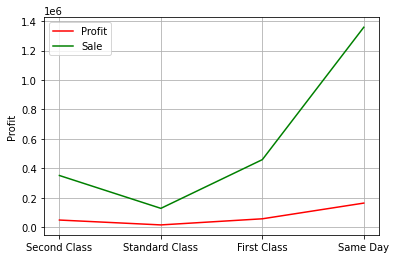

In [21]:
sns.lineplot(x = ['Second Class', 'Standard Class', 'First Class', 'Same Day'], y = gp_sm.Profit, color = "red", label = "Profit")
sns.lineplot(x = ['Second Class', 'Standard Class', 'First Class', 'Same Day'], y = gp_sm.Sales, color = "green", label = "Sale")
plt.grid()
plt.show()

_Among all the Ship-Modes, "Standard Class" is having least profit as well as sale hence it must be considered for improvement_ 